In [6]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [4]:
spark = SparkSession.builder.appName("Store").getOrCreate()

23/09/27 18:58:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [5]:
df = spark.read.format("csv").option("header","true").load('data.csv')

In [7]:
countAllSell = df.groupBy("Product")\
    .agg(
        F.sum("Quantity").alias("CountQuantity")
    )

In [8]:
countAllSell.show()

+---------+-------------+
|  Product|CountQuantity|
+---------+-------------+
|Product A|         83.0|
|Product B|         33.0|
|Product C|         57.0|
+---------+-------------+



In [9]:
countAllSell.agg(F.sum("CountQuantity").alias("AllCountSell")).show()

+------------+
|AllCountSell|
+------------+
|       173.0|
+------------+



In [10]:
df.groupBy("Product").agg(
    F.avg("Price").alias("AvgPrice")
).show()

+---------+--------+
|  Product|AvgPrice|
+---------+--------+
|Product A|   25.25|
|Product B|    15.5|
|Product C|   10.75|
+---------+--------+



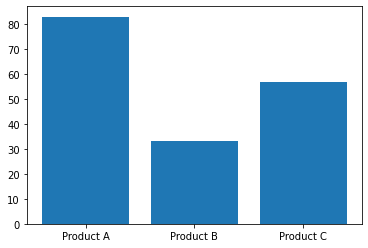

In [15]:
import matplotlib.pyplot as plt
forGraph = countAllSell.toPandas()
plt.bar(forGraph["Product"],forGraph["CountQuantity"])
plt.show()